In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import riesling as rl
prefix='kernels'
!rm {prefix}*.h5

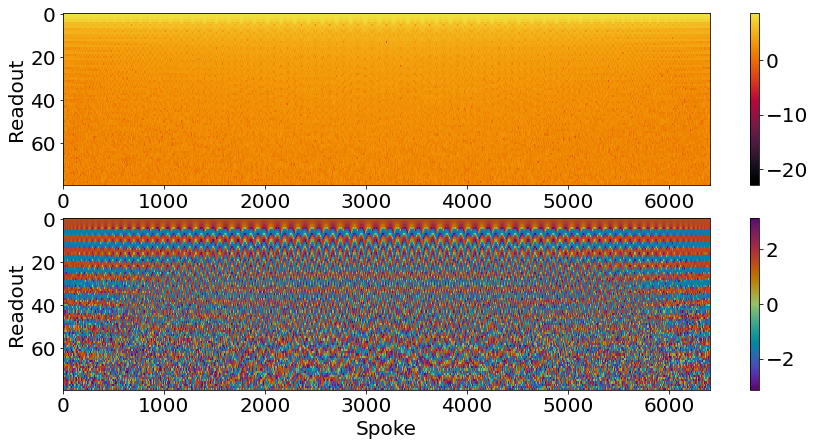

In [2]:
mat = 80
snr = 50
nchan = 4
!riesling phantom {prefix} --shepp_logan --matrix={mat} --snr={snr} --channels={nchan} --os=2.5
!riesling sdc --sdc=pipe {prefix}.h5
!riesling sense-calib --sdc={prefix}-sdc.h5 {prefix}.h5 --fov=256
rl.plots.kspace(f'{prefix}.h5',channel=1)

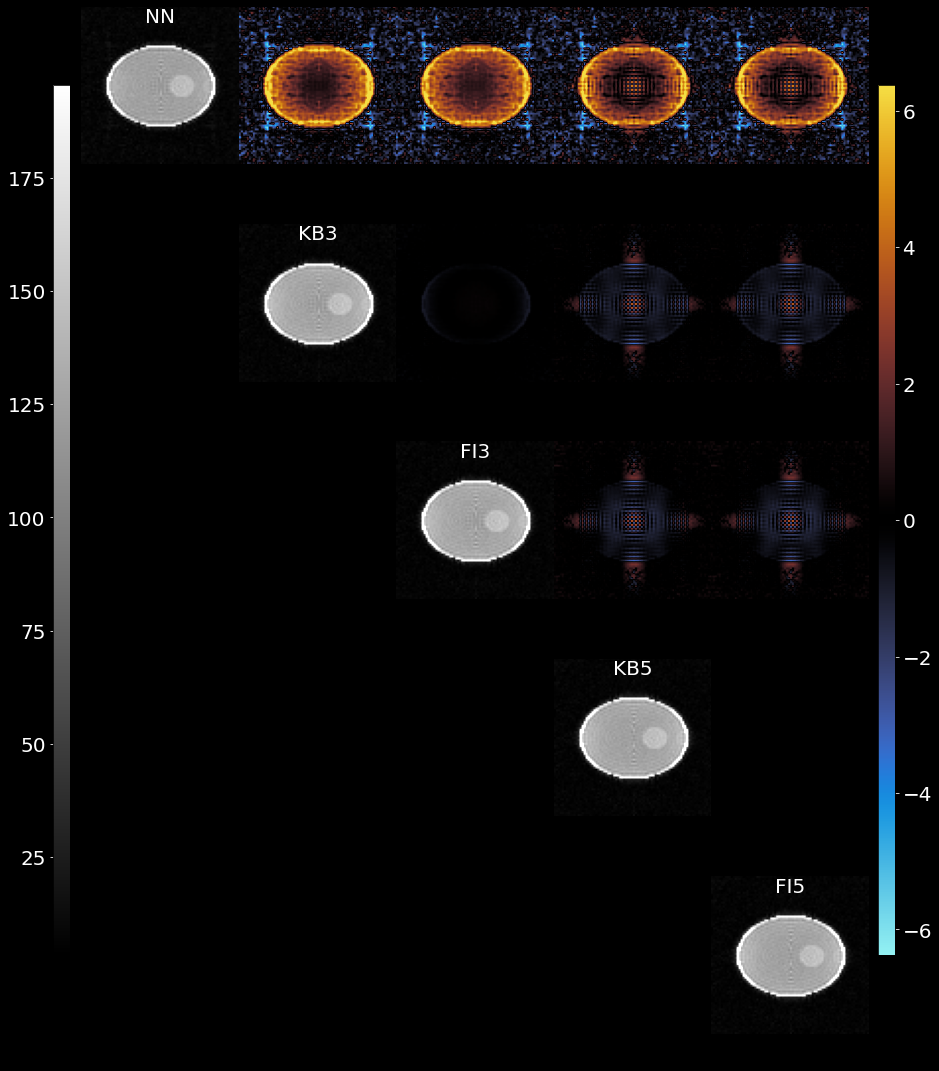

In [3]:
kernels=['NN','KB3','FI3','KB5','FI5']
recon = f'--rss --sdc={prefix}-sdc.h5'
for k in kernels:
    !riesling recon {recon} --kernel={k} {prefix}.h5 -o {prefix}-{k}
files=[f'{prefix}-{k}-recon.h5' for k in kernels]
rl.images.diffN(files, titles=kernels)